In [20]:
import tensorflow as tf
import mask_functions
import matplotlib.pyplot as plt
import numpy as np
from TFRecordGenerator import TFRecordGenerator

In [2]:
tfr_filepath = "./data/dataset.tfrecord"

tfr_generator = TFRecordGenerator()
tfr_generator.write_all_to_tfrecord("./data", tfr_filepath)

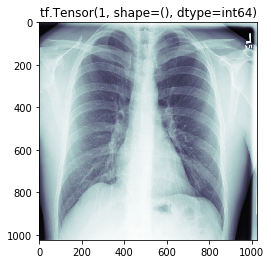

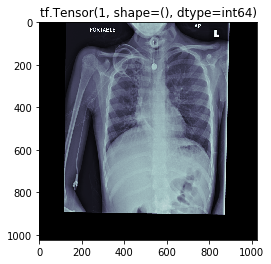

In [47]:
def tfr_decode(data):
    label = data['label']
    shape = tf.io.decode_raw(data['shape'], tf.int32)
    img = tf.io.decode_raw(data['image'], tf.uint8)
    img = tf.reshape(img, shape)
    
    return img, label

dataset = tf.data.TFRecordDataset([tfr_filepath])
dataset = dataset.map(tfr_generator.parse_function, num_parallel_calls=4)
dataset = dataset.map(tfr_decode, num_parallel_calls=4)

for img, label in dataset.take(2):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.bone)
    plt.title(str(label))